In [24]:
import nltk
import pandas as pd
import re
import numpy as np
import scipy as sp
import sys
from collections import Counter
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
edges = pd.read_csv('Test.csv')


In [3]:
edges.rename_axis({'RelationSymbolicName':'Relation','msrc':'Sentences'},axis=1, inplace=True)

In [4]:
edges['Relation'][0]

'positive MolSynthesis: CRH --+> cortisol'

In [5]:
edges['Relation'][0] = re.sub('.*(?<=: )','',edges['Relation'][0])

In [6]:
edges['Sentences'] = edges['Sentences'].apply(lambda x: re.sub('{.*?}','',x))

In [7]:
edges

,Relation,Sentences
0,CRH --+> cortisol,ID ID may regulate ID via its effects on ID pe...
1,positive MolSynthesis: ACTH --+> cortisol,"Besides, different types of ID were shown to p..."
2,negative MolSynthesis: cortisol ---| ACTH,"Finally, it has been previously shown that ID ..."
3,DirectRegulation: cortisol ---> CRH,Blocking ID-stimulated increases in ID and ID ...
4,negative DirectRegulation: cortisol ---| CRH,Blocking ID-stimulated increases in ID and ID ...
5,positive DirectRegulation: ACTH --+> CRH,Blocking ID-stimulated increases in ID and ID ...
6,positive MolTransport: CRH --+> ACTH,ID induces the release of ID from the ID which...
7,MolTransport: cortisol ---> CRH,While ID suppresses the secretion of ID from t...
8,MolTransport: cortisol ---> ACTH,ID acts via feedback inhibition of its own sec...
9,positive MolTransport: ACTH --+> cortisol,ID is a ID-sensitive peptide that is released ...


In [8]:
words = re.findall(r'\w+', str.lower(edges['Sentences'][2]))
words_frame = pd.DataFrame(words)
s = set(nltk.corpus.stopwords.words('english'))
s.add('id')

In [9]:
word_count = Counter([x for x in words if x not in s])

In [10]:
len(words)

1269

In [11]:
len(word_count)

284

In [12]:
data = pd.DataFrame(word_count.most_common(25))

In [13]:
data.columns=['Words','Count']

<IPython.core.display.Javascript object>


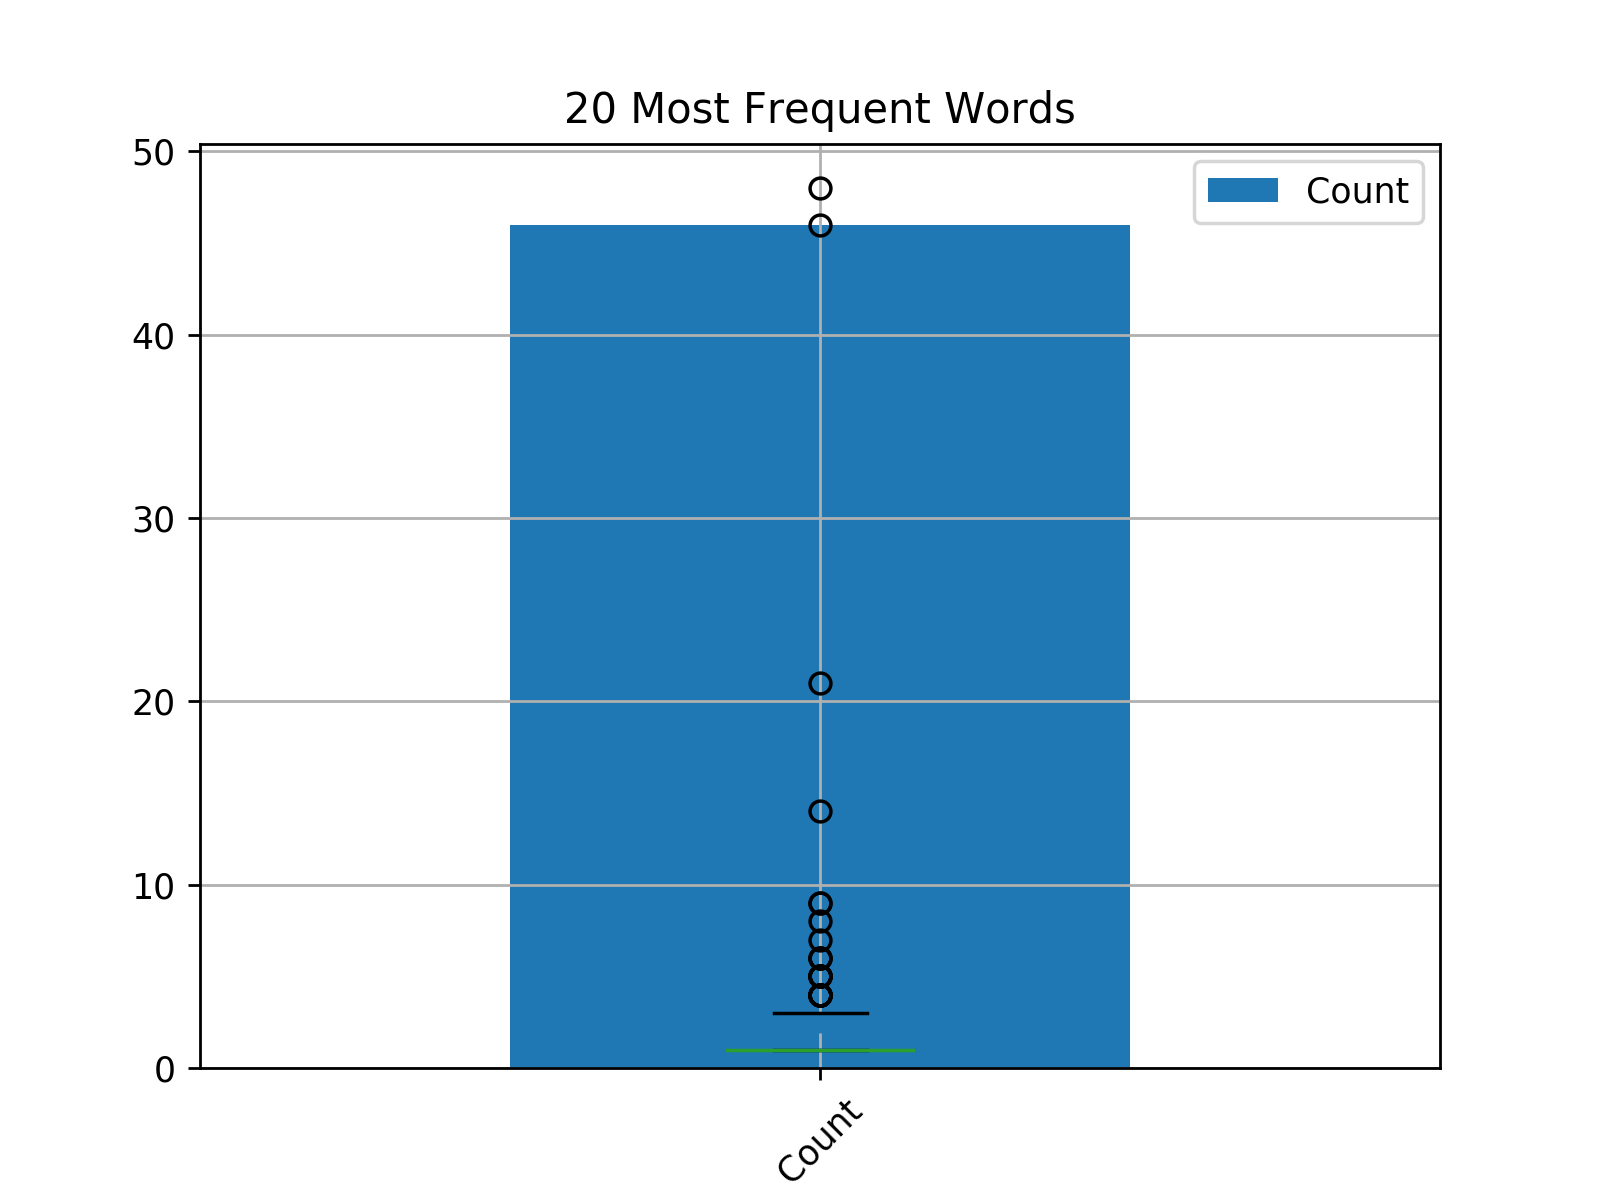

In [14]:
data.head(20).plot.bar(x=data.head(20)['Words'], title='20 Most Frequent Words', rot = 55)

In [18]:
data

,Words,Count
0,production,48
1,context,46
2,feedback,21
3,negative,14
4,synthesis,9
5,secretion,9
6,stimulates,8
7,inhibit,7
8,increased,6
9,causes,6


In [19]:
kwords = list(word_count.keys())
vwords = list(word_count.values())

In [20]:
df = pd.DataFrame(kwords)

In [21]:
df['Count'] = vwords

In [22]:
df.sort_values(by='Count', ascending=False, inplace=True)

<IPython.core.display.Javascript object>


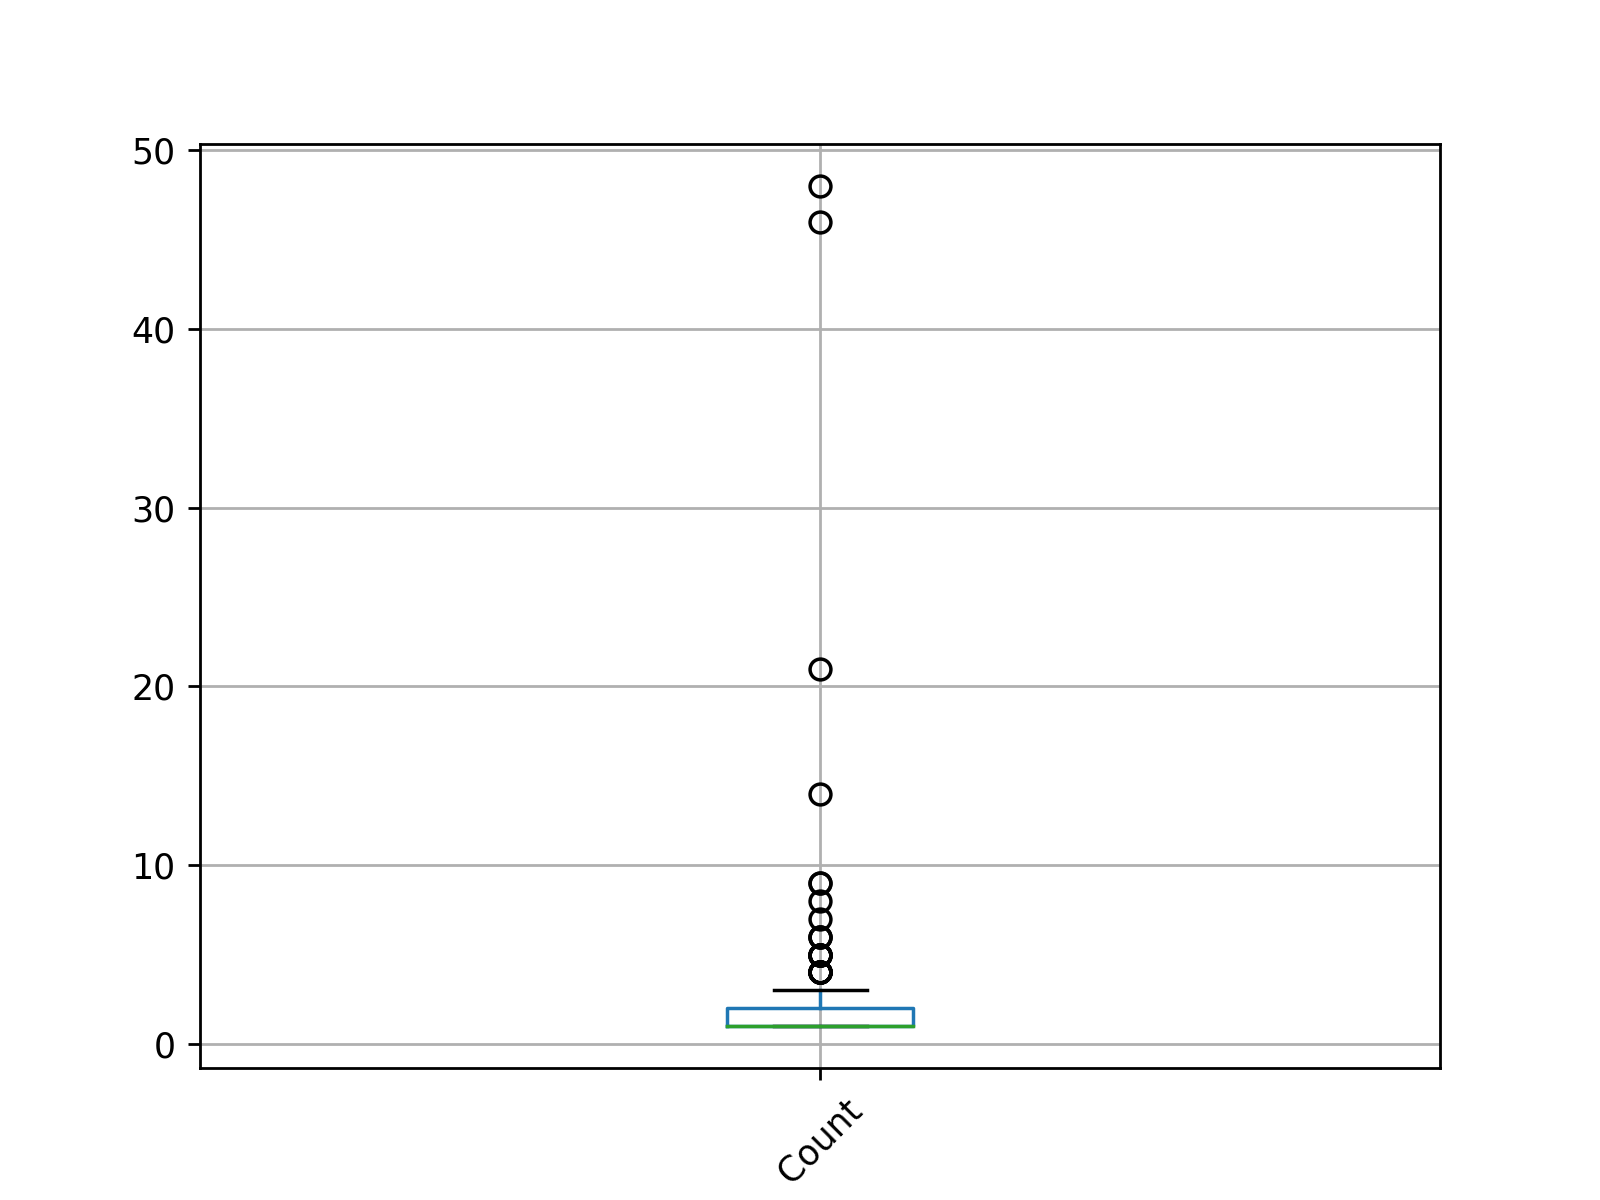

In [25]:
df.boxplot(rot=45)

In [ ]:
data.h